## 맛집 예제 


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//cloud.typography.com" rel="dns-prefetch"/>
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com
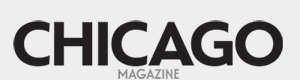

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")

soup

In [2]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Al

In [3]:
len(soup.find_all('div', 'sammy'))

50

In [4]:
print(soup.find_all('div', 'sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


## 원하는 데이터 추출

In [5]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [6]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [7]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [8]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [9]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [10]:
import re

tmp_string = tmp_one.find(class_='sammyListing').get_text()

re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


In [11]:
from urllib.parse import urljoin

In [12]:
rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()

    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [21]:
rank[:5]

['1', '2', '3', '4', '5']

In [22]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [23]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [16]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [17]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

---

In [18]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

Cafe               Menu Rank  \
0             Old Oak Tap                BLT    1   
1               Au Cheval      Fried Bologna    2   
2                    Xoco  Woodland Mushroom    3   
3               Al’s Deli         Roast Beef    4   
4  Publican Quality Meats               PB&L    5   

                                                 URL  
0  http://www.chicagomag.com/Chicago-Magazine/Nov...  
1  http://www.chicagomag.com/Chicago-Magazine/Nov...  
2  http://www.chicagomag.com/Chicago-Magazine/Nov...  
3  http://www.chicagomag.com/Chicago-Magazine/Nov...  
4  http://www.chicagomag.com/Chicago-Magazine/Nov...

In [19]:
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head(5)

Rank                    Cafe               Menu  \
0    1             Old Oak Tap                BLT   
1    2               Au Cheval      Fried Bologna   
2    3                    Xoco  Woodland Mushroom   
3    4               Al’s Deli         Roast Beef   
4    5  Publican Quality Meats               PB&L   

                                                 URL  
0  http://www.chicagomag.com/Chicago-Magazine/Nov...  
1  http://www.chicagomag.com/Chicago-Magazine/Nov...  
2  http://www.chicagomag.com/Chicago-Magazine/Nov...  
3  http://www.chicagomag.com/Chicago-Magazine/Nov...  
4  http://www.chicagomag.com/Chicago-Magazine/Nov...

In [24]:
df.to_csv('../data/03. best_sandwiches_list_chicago.csv', sep=',', 
          encoding='UTF-8')
df

Rank                             Cafe  \
0     1                      Old Oak Tap   
1     2                        Au Cheval   
2     3                             Xoco   
3     4                        Al’s Deli   
4     5           Publican Quality Meats   
5     6  Hendrickx Belgian Bread Crafter   
6     7                           Acadia   
7     8                Birchwood Kitchen   
8     9                   Cemitas Puebla   
9    10                             Nana   
10   11                        Lula Cafe   
11   12                       Ricobene’s   
12   13                     Frog n Snail   
13   14                 Crosby’s Kitchen   
14   15                  Longman & Eagle   
15   16                             Bari   
16   17                          Manny’s   
17   18                           Eggy’s   
18   19                    Old Jerusalem   
19   20             Mindy’s HotChocolate   
20   21              Olga’s Delicatessen   
21   22     Dawali Mediterranean Kitchen   
22   23                        Big Jones   
23   24                          La Pane   
24   25                         Pastoral   
25   26                       Max’s Deli   
26   27             Lucky’s Sandwich Co.   
27   28                  City Provisions   
28   29             Papa’s Cache Sabroso   
29   30            Bavette’s Bar & Boeuf   
30   31                 Hannah’s Bretzel   
31   32                     La Fournette   
32   33                   Paramount Room   
33   34             Melt Sandwich Shoppe   
34   35           Floriole Cafe & Bakery   
35   36             First Slice Pie Café   
36   37                          Troquet   
37   38                       Grahamwich   
38   39                   Saigon Sisters   
39   40                   Rosalia’s Deli   
40   41                   Z&H MarketCafe   
41   42       Market House on the Square   
42   43             Elaine’s Coffee Call   
43   44      Marion Street Cheese Market   
44   45                         Cafecito   
45   46                         Chickpea   
46   47           The Goddess and Grocer   
47   48                          Zenwich   
48   49                  Toni Patisserie   
49   50                  Phoebe’s Bakery   

                                              Menu  \
0                                              BLT   
1                                    Fried Bologna   
2                                Woodland Mushroom   
3                                       Roast Beef   
4                                             PB&L   
5                      Belgian Chicken Curry Salad   
6                                     Lobster Roll   
7                              Smoked Salmon Salad   
8                                  Atomica Cemitas   
9   Grilled Laughing Bird Shrimp and Fried Po’ Boy   
10                         Ham and Raclette Panino   
11                                   Breaded Steak   
12                                     The Hawkeye   
13                                     Chicken Dip   
14                            Wild Boar Sloppy Joe   
15                                    Meatball Sub   
16                                     Corned Beef   
17                                     Turkey Club   
18                                         Falafel   
19                                       Crab Cake   
20                               Chicken Schnitzel   
21                                        Shawarma   
22                         Toasted Pimiento Cheese   
23                               Vegetarian Panino   
24                                     Cali Chèvre   
25                                        Pastrami   
26                                       The Fredo   
27                                      Smoked Ham   
28                                        Jibarito   
29                                Shaved Prime Rib   
30                 Serrano Ham and Manchego Cheese   
31                            

# SQLite Example

In [25]:
df['Rank'][0]

'1'

In [28]:
import sqlite3

conn = sqlite3.connect("mytest.db")

conn 

c = conn.cursor() 

c.execute('DROP TABLE IF EXISTS goodplace')
c.execute('''CREATE TABLE goodplace (id integer  primary key,
                                     rank text,
                                     cafe text,
                                     menu text,
                                     addr text)''')



In [32]:
result = c.execute('select * from goodplace')
for row in result: 
    print(row[0], row[1])

In [ ]:
for i in df.index:    
    c.execute('INSERT INTO goodplace VALUES(?, ?, ?, ? ,?)'
              ,(i, df['Rank'][i],df['Cafe'][i],df['Menu'][i],df['URL'][i]))

In [45]:
result = c.execute('select * from goodplace')
for row in result: 
    print("{} {} {} {}\n {} \n".format(row[0],row[1],row[2],row[3],row[4]))

0 1 Old Oak Tap BLT
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/ 

1 2 Au Cheval Fried Bologna
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/ 

2 3 Xoco Woodland Mushroom
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/ 

3 4 Al’s Deli Roast Beef
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/ 

4 5 Publican Quality Meats PB&L
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/ 

5 6 Hendrickx Belgian Bread Crafter Belgian Chicken Curry Salad
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/ 

6 7 Acadia Lobster Roll
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chic

In [52]:
import sqlite3
con = sqlite3.connect("mytest4.db")
df.to_sql('goodplace', con)

In [56]:
cur = con.cursor()
result = cur.execute('select * from goodplace')
for row in result: 
    print("{} {} {} {}\n {} \n".format(row[0],row[1],row[2],row[3],row[4]))

0 1 Old Oak Tap BLT
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/ 

1 2 Au Cheval Fried Bologna
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/ 

2 3 Xoco Woodland Mushroom
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/ 

3 4 Al’s Deli Roast Beef
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/ 

4 5 Publican Quality Meats PB&L
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/ 

5 6 Hendrickx Belgian Bread Crafter Belgian Chicken Curry Salad
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/ 

6 7 Acadia Lobster Roll
 http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chic